In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
## List of pandas dataframes
all_results = []
num_threads = [1, 2, 4, 8, 16, 32]

In [17]:
final_folder = 'final_results/'
# get all folders in the final_results directory
all_result_folders = os.listdir(final_folder)


In [198]:
def is_concurrent_perf(file_path:str)-> bool:
    """
    Check if the file is a concurrent performance result file.
    :param file: file name
    :return: True if the file is a concurrent performance result file, False otherwise
    """
    return file_path.startswith('concurrent') and file_path.endswith('_perf.txt')

def is_independent_perf(file_path:str)-> bool:
    """
    Check if the file is a concurrent performance result file.
    :param file: file name
    :return: True if the file is a concurrent performance result file, False otherwise
    """
    return file_path.startswith('independent') and file_path.endswith('_perf.txt')

def is_hyper(file_path: str)-> bool:
    """
    Check if the file is a hyper performance result file.
    :param file: file name
    :return: True if the file is a hyper performance result file, False otherwise
    """
    return 'hyper' in file_path

def is_numa_0(file_path: str)-> bool:
    """
    Check if the file is a numa 0 performance result file.
    :param file: file name
    :return: True if the file is a numa 0 performance result file, False otherwise
    """
    return 'numa_0' in file_path

def is_no_affinity(file_path: str)-> bool:
    """
    Check if the file is a no affinity performance result file.
    :param file: file name
    :return: True if the file is a no affinity performance result file, False otherwise
    """
    return 'no_affinity' in file_path

def is_multi_numa(file_path: str)-> bool:
    """
    Check if the file is a multi numa performance result file.
    :param file: file name
    :return: True if the file is a multi numa performance result file, False otherwise
    """
    return 'multi_numa' in file_path

def get_affinity_setting(file_path: str)-> str:
    """
    Get the affinity setting from the file name.
    :param file: file name
    :return: affinity setting
    """
    if is_hyper(file_path):
        return 'hyper_threading'
    elif is_numa_0(file_path):
        return 'numa_0'
    elif is_multi_numa(file_path):
        return 'multi_numa'
    elif is_no_affinity(file_path):
        return ''
    else:
        raise ValueError('Unknown affinity setting')

def get_affinity_setting_title(file_path: str)-> str:
    """
    Get the affinity setting from the file name.
    :param file: file name
    :return: affinity setting
    """
    if is_hyper(file_path):
        return 'hyper_threading'
    elif is_numa_0(file_path):
        return 'numa_0'
    elif is_multi_numa(file_path):
        return 'multi_numa'
    elif is_no_affinity(file_path):
        return 'no_affinity'
    else:
        raise ValueError('Unknown affinity setting')


In [ ]:
current_folder = all_perf_result_folders[0]

# Go into the folder and get all txt files
folder_path = os.path.join(final_folder, current_folder)
all_txt_files = os.listdir(folder_path)        
# Only keep the txt files
concurrent_txt_files = [file for file in all_txt_files if is_concurrent_perf(file)]
indpendent_txt_files = [file for file in all_txt_files if is_independent_perf(file)]
    
    

In [351]:
def read_value_key(line: str)-> tuple[str, int, float]:
    """
    Read the value and key from the file name.
    :param read_file: file name
    :return: tuple of value and key
    """
    # Split the file name by '_'
    words = line.split()
    # if 'instructions' in words:

    
    count = words[0]
    key = words[1] 
    # Get the last word (the percentage) and remove the parentheses to parse it to a float
    if(len(words) > 2):
        percentage = float(words[-1].strip("()%"))
    else:
        percentage = None
    

    return key, int(count), percentage


In [352]:
def read_perf_file(current_folder: str, perf_txt_file: str)-> pd.DataFrame:
    """
    """
    columns = ['key', 'count', 'percentage']
    df = pd.DataFrame(columns=columns)
    current_file_path = final_folder + '/' + current_folder + '/' + perf_txt_file
    print(current_file_path, end=' ')
    with open(current_file_path, 'r') as read_file:
        # all_lines = read_file.readlines()
        # for i, line in enumerate(all_lines):
        #     print(f"Line {i}: {line}")
        # get rid of the first 5 lines
        _ = read_file.readline()
        _ = read_file.readline()
        _ = read_file.readline()
        _ = read_file.readline()
        _ = read_file.readline()

        for i in range(11):
            line = read_file.readline()
            try:
                key, count, percentage = read_value_key(line)
                df.loc[len(df)] = [key, count, percentage]
            except ValueError as e:
                print(f"Error reading line {i}: {e}")
        _ = read_file.readline()
        line12 = read_file.readline()
        print(line12)
        return df

In [353]:
# Only keep the folders that start with 'perf_' 
all_perf_result_folders = [folder for folder in all_result_folders if folder.startswith('perf_') and not folder.endswith('.txt')]
for perf_result_folder in all_perf_result_folders:

    # Go into the folder and get all txt files
    folder_path = os.path.join(final_folder, perf_result_folder)
    all_txt_files = os.listdir(folder_path)        
    # Only keep the txt files
    concurrent_txt_files = [file for file in all_txt_files if is_concurrent_perf(file)]
    indpendent_txt_files = [file for file in all_txt_files if is_independent_perf(file)]
    
    for concurrent_txt_file in concurrent_txt_files:
        # Read the file and store it in a dataframe
        df = read_perf_file(perf_result_folder, concurrent_txt_file)
        current_file = os.path.join(final_folder, perf_result_folder) + '/' + concurrent_txt_file.replace(".txt", ".csv")
        df.to_csv(current_file)
    
    for concurrent_txt_file in indpendent_txt_files:
        # Read the file and store it in a dataframe
        df = read_perf_file(perf_result_folder, concurrent_txt_file)
        current_file = os.path.join(final_folder, perf_result_folder) + '/' + concurrent_txt_file.replace(".txt", ".csv")
        df.to_csv(current_file)

final_results//perf_2025-03-27_09-54-24_numa_0/concurrent_numa_0_1_perf.txt      156.516362399 seconds time elapsed

final_results//perf_2025-03-27_09-54-24_numa_0/concurrent_numa_0_4_perf.txt      121.175579442 seconds time elapsed

final_results//perf_2025-03-27_09-54-24_numa_0/concurrent_numa_0_32_perf.txt      144.394514757 seconds time elapsed

final_results//perf_2025-03-27_09-54-24_numa_0/concurrent_numa_0_16_perf.txt      131.369821761 seconds time elapsed

final_results//perf_2025-03-27_09-54-24_numa_0/concurrent_numa_0_8_perf.txt      104.816528143 seconds time elapsed

final_results//perf_2025-03-27_09-54-24_numa_0/concurrent_numa_0_2_perf.txt      149.461178155 seconds time elapsed

final_results//perf_2025-03-27_09-54-24_numa_0/independent_numa_0_1_perf.txt      126.256718609 seconds time elapsed

final_results//perf_2025-03-27_09-54-24_numa_0/independent_numa_0_16_perf.txt       98.588137183 seconds time elapsed

final_results//perf_2025-03-27_09-54-24_numa_0/independent_

/tmp/ipykernel_2007/1094031967.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[len(df)] = [key, count, percentage]
/tmp/ipykernel_2007/1094031967.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[len(df)] = [key, count, percentage]
/tmp/ipykernel_2007/1094031967.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. 

     131.803525099 seconds time elapsed

final_results//perf_2025-03-29_15-56-51_numa_0/concurrent_numa_0_8_perf.txt      104.184750329 seconds time elapsed

final_results//perf_2025-03-29_15-56-51_numa_0/concurrent_numa_0_2_perf.txt      149.488692236 seconds time elapsed

final_results//perf_2025-03-29_15-56-51_numa_0/independent_numa_0_1_perf.txt      126.869199945 seconds time elapsed

final_results//perf_2025-03-29_15-56-51_numa_0/independent_numa_0_16_perf.txt      100.088312940 seconds time elapsed

final_results//perf_2025-03-29_15-56-51_numa_0/independent_numa_0_32_perf.txt      135.401756763 seconds time elapsed

final_results//perf_2025-03-29_15-56-51_numa_0/independent_numa_0_4_perf.txt       57.000673784 seconds time elapsed

final_results//perf_2025-03-29_15-56-51_numa_0/independent_numa_0_2_perf.txt       79.444168247 seconds time elapsed

final_results//perf_2025-03-29_15-56-51_numa_0/independent_numa_0_8_perf.txt       46.545253283 seconds time elapsed

final_results//

/tmp/ipykernel_2007/1094031967.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[len(df)] = [key, count, percentage]
/tmp/ipykernel_2007/1094031967.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[len(df)] = [key, count, percentage]
/tmp/ipykernel_2007/1094031967.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. 

In [192]:
def get_data_for_key(folder: str, par_method: str, key: str) -> list[int]:
    ys = []
    affinity = get_affinity_setting(folder)
    
    # To get results from the no affinity case
    if affinity != '':
        affinity = '_' + affinity 

    
    for threads in num_threads:

        current_file = f"final_results/{folder}/{par_method}{affinity}_{str(threads)}_perf.csv"
        df = pd.read_csv(current_file)
        df_cache_misses = df[df['key'] == key]
        ys.append(df_cache_misses["count"].values[0])
    return ys

In [193]:
all_perf_result_folders.sort()

In [194]:
all_perf_result_folders[:-1]


['perf_2025-03-26_08-04-01_no_affinity',
 'perf_2025-03-26_10-03-57_hyper',
 'perf_2025-03-27_07-59-07_multi_numa',
 'perf_2025-03-27_09-54-24_numa_0']

In [335]:
def create_bar_chart(key: str, par_method: str, yticks: list = None, save: bool = False) -> tuple[plt.Figure, plt.Axes]:
    fig, ax = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)
    fig.tight_layout(pad=3.0)
    key_cap = key
    par_cap = par_method.capitalize()
    fig.suptitle(f'{par_cap} - {key_cap} for Different Affinity Settings')
    bar_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for i, perf_result_folder in enumerate(all_perf_result_folders[:-1]):

        row = i // 2
        col = i % 2
        # Read the file and store it in a dataframe
        data = get_data_for_key(perf_result_folder, par_method, key)


        ax[row, col].set_title(f"{get_affinity_setting_title(perf_result_folder)}")
        ax[row,col].bar(range(len(num_threads)), data, color=bar_colors)
        ax[row, col].set_xticks(range(len(num_threads)))
        ax[row,col].set_xticklabels(num_threads)
        
        if yticks is not None:
            ax[row, col].set_yticks(yticks)
        
        if(row == 1):
            ax[row, col].set_xlabel('# of Threads')
        if col == 0:
            ax[row, col].set_ylabel(key_cap)
    if save:
        plt.savefig(f'final_results/figs/{par_method}_{key}_bar_chart.png')

            
    return fig, ax
        

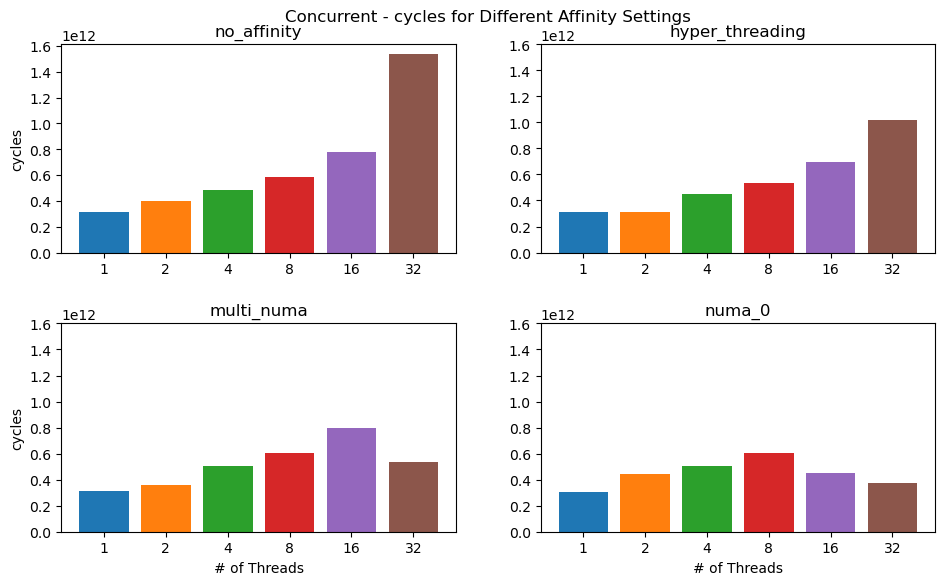

In [336]:
key: str = 'cycles'
yticks = [a*10e10 for a in range(0, 18, 2)]
fig, ax = create_bar_chart(key, 'concurrent',  yticks, save=True)

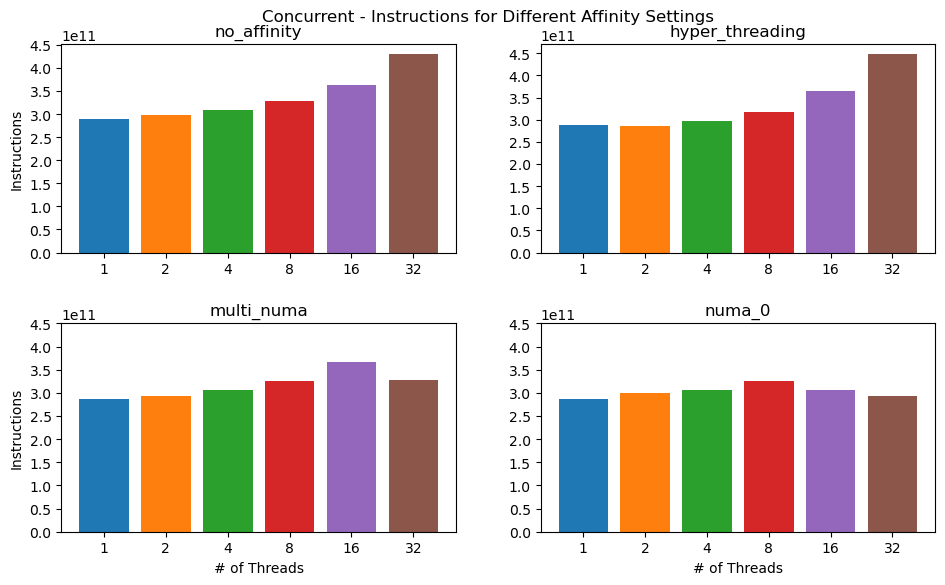

In [321]:
yticks = [a*10e9 for a in range(0, 50, 5)]
fig, ax = create_bar_chart('instructions', 'concurrent', yticks, save=True)

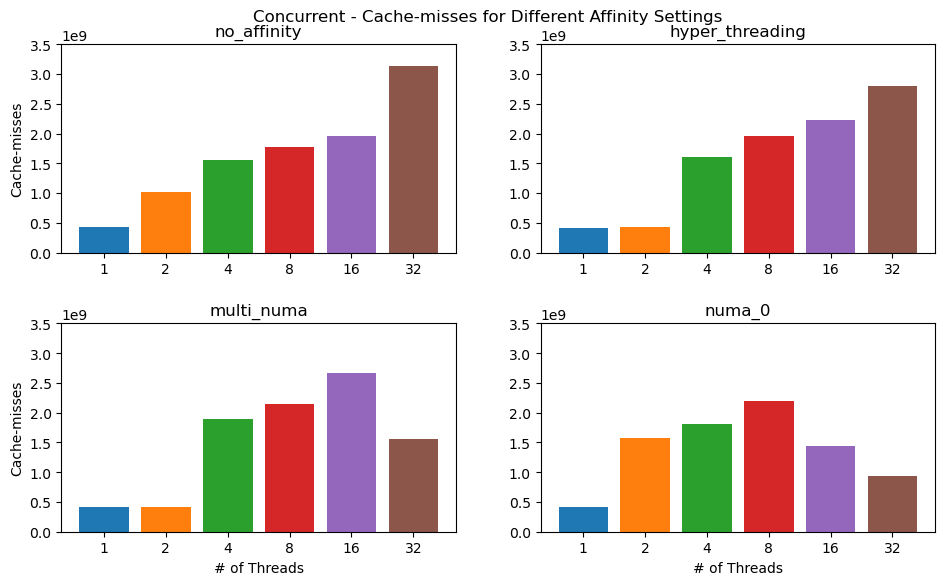

In [320]:
yticks = [i * 10e7 for i in range(0, 40, 5)]
fig, ax = create_bar_chart('cache-misses', 'concurrent', yticks, save=True)

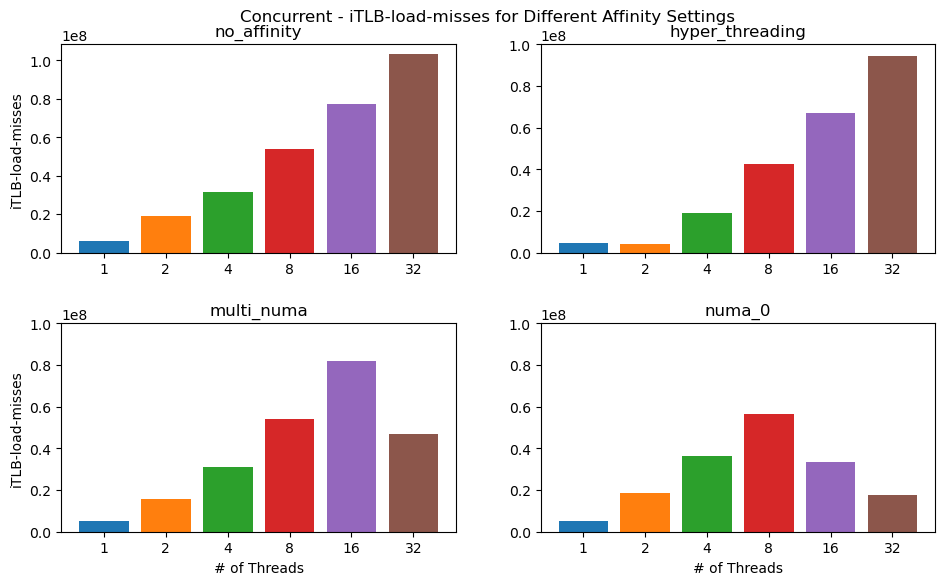

In [337]:
key = 'iTLB-load-misses'
yticks = [i * 10e6 for i in range(0, 12,2)]
fig, ax = create_bar_chart(key, 'concurrent', yticks, save=True)


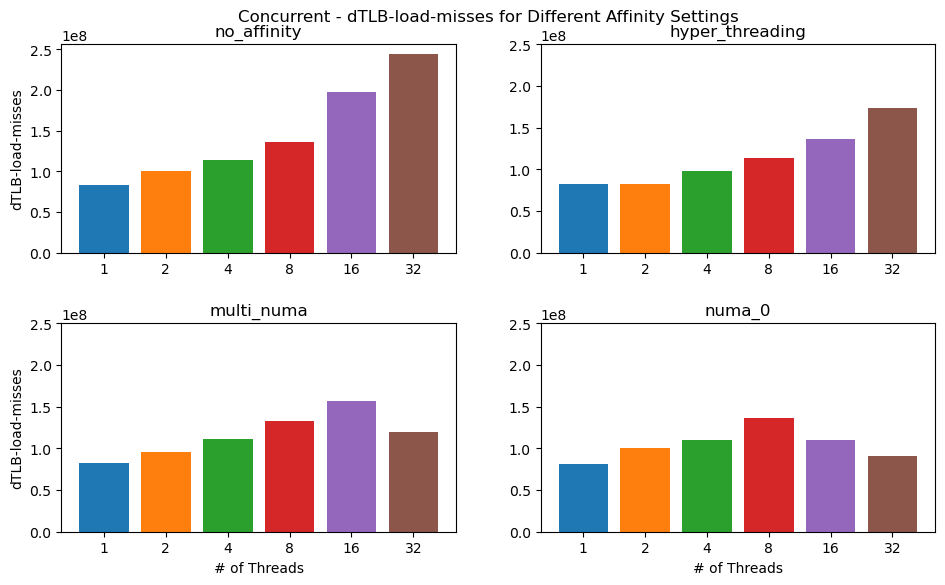

In [ ]:
key = 'dTLB-load-misses'
yticks = [i * 10e6 for i in range(0, 30, 5)]
fig, ax = create_bar_chart(key, 'concurrent', yticks, save=True)

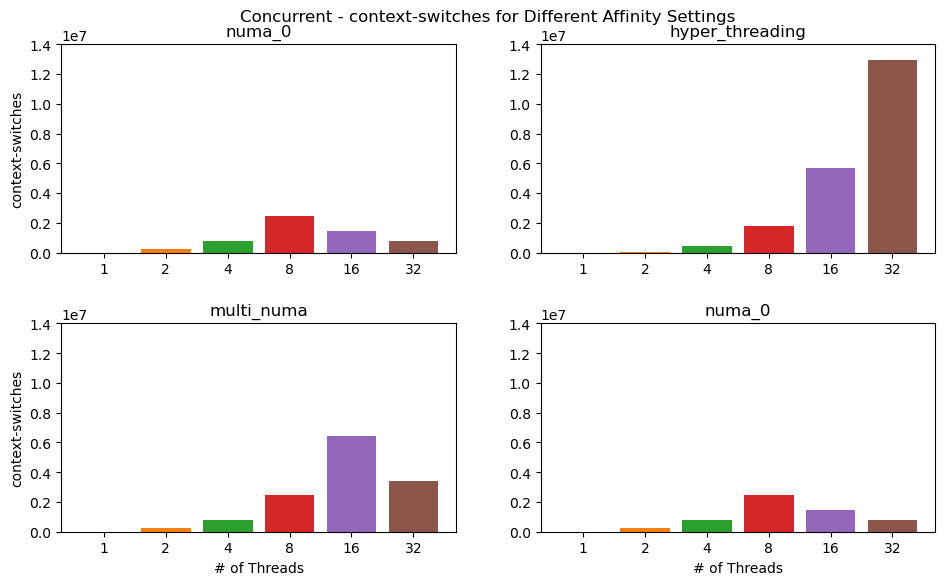

In [361]:
key = 'context-switches'
yticks = [i * 10e5 for i in range(0, 15, 2)]
fig, ax = create_bar_chart(key, 'concurrent', yticks, save=True)